In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
data = pd.read_csv('/content/UCI_Credit_Card.csv')


In [ ]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
print(data)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows/columns if necessary
data.fillna(0, inplace=True)

# Convert categorical variables to numeric if needed
# For example, if SEX, EDUCATION, MARRIAGE are categorical
data['SEX'] = data['SEX'].astype('category').cat.codes
data['EDUCATION'] = data['EDUCATION'].astype('category').cat.codes
data['MARRIAGE'] = data['MARRIAGE'].astype('category').cat.codes


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the features and target variable
X = data.drop(columns=['default.payment.next.month', 'ID'])
y = data['default.payment.next.month']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Define parameter grid for Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
}

# Initialize Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_model = grid_search.best_estimator_

# Predict probabilities with the best model
pd_predictions = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"ROC AUC Score: {roc_auc_score(y_test, pd_predictions)}")



Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
ROC AUC Score: 0.6648403298585918


In [ ]:
# Assume LGD and EAD as constants or derive them from data
LGD = 0.45  # Example: 45% loss given default
EAD = X_test['LIMIT_BAL']  # Use credit limit as exposure at default

# Calculate expected loss
el = pd_predictions * LGD * EAD

# Create a copy of X_test to avoid modifying the original DataFrame
X_test_with_el = X_test.copy()
X_test_with_el['Expected_Loss'] = el

print(X_test_with_el[['Expected_Loss']].head())



       Expected_Loss
2308     4931.082258
22404   18180.268015
23397   10701.856479
25058   11816.826639
2664     5332.653102


In [ ]:
from sklearn.metrics import accuracy_score

# Predict default (binary classification)
predictions = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

# Cross-validation for model robustness
scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")



Accuracy: 0.7811666666666667
Cross-Validation Scores: [0.7785     0.77866667 0.77883333 0.77883333 0.77883333]


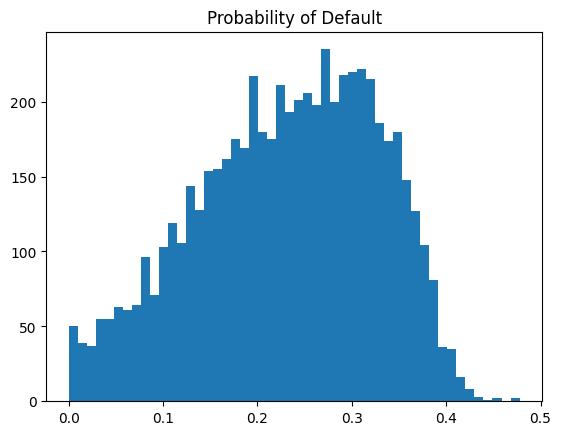

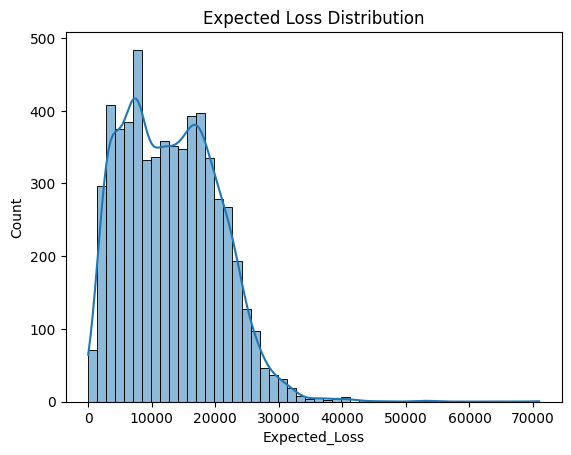

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of predicted probabilities
plt.hist(pd_predictions, bins=50)
plt.title('Probability of Default')
plt.show()

# Plot Expected Loss distribution
sns.histplot(X_test_with_el['Expected_Loss'], bins=50, kde=True)
plt.title('Expected Loss Distribution')
plt.show()


In [ ]:
import pickle


# Save the model
with open('/model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [ ]:
# app.py
import streamlit as st
import pandas as pd
import pickle

# Load the model
with open('/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Define the Streamlit app
st.title("Credit Risk Prediction")
st.write("Enter the details to predict the probability of default:")

# Input fields for user to enter data
LIMIT_BAL = st.number_input('Credit Limit (LIMIT_BAL)', min_value=0, step=1000)
SEX = st.selectbox('Sex (SEX)', [1, 2])
EDUCATION = st.selectbox('Education Level (EDUCATION)', [1, 2, 3, 4])
MARRIAGE = st.selectbox('Marital Status (MARRIAGE)', [1, 2, 3])
AGE = st.number_input('Age (AGE)', min_value=18, max_value=100, step=1)
PAY_0 = st.number_input('Repayment Status (PAY_0)', min_value=-2, max_value=8, step=1)
PAY_2 = st.number_input('Repayment Status (PAY_2)', min_value=-2, max_value=8, step=1)
PAY_3 = st.number_input('Repayment Status (PAY_3)', min_value=-2, max_value=8, step=1)
PAY_4 = st.number_input('Repayment Status (PAY_4)', min_value=-2, max_value=8, step=1)
PAY_5 = st.number_input('Repayment Status (PAY_5)', min_value=-2, max_value=8, step=1)
PAY_6 = st.number_input('Repayment Status (PAY_6)', min_value=-2, max_value=8, step=1)
BILL_AMT1 = st.number_input('Bill Amount (BILL_AMT1)', min_value=0, step=1000)
BILL_AMT2 = st.number_input('Bill Amount (BILL_AMT2)', min_value=0, step=1000)
BILL_AMT3 = st.number_input('Bill Amount (BILL_AMT3)', min_value=0, step=1000)
BILL_AMT4 = st.number_input('Bill Amount (BILL_AMT4)', min_value=0, step=1000)
BILL_AMT5 = st.number_input('Bill Amount (BILL_AMT5)', min_value=0, step=1000)
BILL_AMT6 = st.number_input('Bill Amount (BILL_AMT6)', min_value=0, step=1000)
PAY_AMT1 = st.number_input('Payment Amount (PAY_AMT1)', min_value=0, step=1000)
PAY_AMT2 = st.number_input('Payment Amount (PAY_AMT2)', min_value=0, step=1000)
PAY_AMT3 = st.number_input('Payment Amount (PAY_AMT3)', min_value=0, step=1000)
PAY_AMT4 = st.number_input('Payment Amount (PAY_AMT4)', min_value=0, step=1000)
PAY_AMT5 = st.number_input('Payment Amount (PAY_AMT5)', min_value=0, step=1000)
PAY_AMT6 = st.number_input('Payment Amount (PAY_AMT6)', min_value=0, step=1000)

# Button to make prediction
if st.button('Predict'):
    input_data = {
        'LIMIT_BAL': LIMIT_BAL,
        'SEX': SEX,
        'EDUCATION': EDUCATION,
        'MARRIAGE': MARRIAGE,
        'AGE': AGE,
        'PAY_0': PAY_0,
        'PAY_2': PAY_2,
        'PAY_3': PAY_3,
        'PAY_4': PAY_4,
        'PAY_5': PAY_5,
        'PAY_6': PAY_6,
        'BILL_AMT1': BILL_AMT1,
        'BILL_AMT2': BILL_AMT2,
        'BILL_AMT3': BILL_AMT3,
        'BILL_AMT4': BILL_AMT4,
        'BILL_AMT5': BILL_AMT5,
        'BILL_AMT6': BILL_AMT6,
        'PAY_AMT1': PAY_AMT1,
        'PAY_AMT2': PAY_AMT2,
        'PAY_AMT3': PAY_AMT3,
        'PAY_AMT4': PAY_AMT4,
        'PAY_AMT5': PAY_AMT5,
        'PAY_AMT6': PAY_AMT6,
    }
    input_df = pd.DataFrame([input_data])
    prediction = model.predict_proba(input_df)[:, 1][0]
    st.write(f"Predicted Probability of Default: {prediction:.2f}")

